# Classification ignition point 

This project is a classification problem

It is to determine whether a point has a probability to be an ignition point for wildfire. The ignition point is where the wildfire starts. To know the probability where a fire would start is central at Descartes because it will help us to better simulate wildfires.

Don't hesitate to contact us, if you have any doubts on what is asked or if you encounter errors while using the notebook.

In [1]:
import random
from pathlib import Path
import pandas as pd

In [2]:
%reload_ext autoreload
%autoreload 2

# Parameters

In [3]:
DATA_PATH = Path("data")
DATAFRAME_FOLDER_PATH = DATA_PATH / "classification_dataframe"

# Download data

In [4]:
dataframe_path = DATAFRAME_FOLDER_PATH / "dataset.csv"

In [5]:
df = pd.read_csv(dataframe_path, index_col=0)
df.head()

,Date,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_deciduous_needle,forest_evergreen_broad,forest_evergreen_needle,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
0,2015-11-19,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,0.0,1.000000,0.0,...,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,14.994683,1
1,2003-02-17,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.0,0.416667,0.0,...,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,15.053698,1
2,2012-02-26,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.0,0.666667,0.0,...,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,15.001883,1
3,2004-11-10,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.0,0.000000,0.0,...,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,14.850611,1
4,2003-03-19,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.0,0.750000,0.0,...,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,NaN,1


# Structure of the dataframe and Task


- Each row consists of an ignition or non-ignition point with the given features associated. The features were chosen as potentially influencing ignition.


- The last column named `ignition` says if the point was a real ignition point (meaning that it occurred historically), in that case the value is `1`. Otherwise, when the value is `0`, it means that it is a 'non-ignition point'.


- The columns `cropland` to `wetland` gives the ratio of each of the vegetation classes under which the ignition or non-ignition point lies. The sum of these ratios should be equal to 1. For more information refer to this website: https://lcviewer.vito.be/


- The temperatures should be in degrees celsius `(°C)`.


- The weather data come from different sources and they might have different units.

| Column name | Definition | Unit |
|--------|-----------|--------|
| `ignition`   | Target column| Boolean: {1,0} |
| `distance_{feature}` | Distance to nearest feature  |  Meters (m) |
| vegetation class: from `cropland` to `wetland`  |  Ratio of each of the vegetation classes  under which the ignition or non-ignition point lies    |  No unit (between 0 and 1)  |
| `aspect`  |  Orientation of the slope    |  Degrees (°)  |
| `elevation`  |  elevation value    |  Meters  |
| `slope`  |  Slope value    |  Degrees (°)  |
| `pop_dens`  |  Population density value    |  Persons per km2  |
| `max_temp`  |  Maximum temperature of the day    |  Degrees celsius (°C)  |
| `avg_temp`  |  Average temperature of the day   |  Degrees celsius (°C)  |
| `max_wind_vel`  |  Maximum wind velocity of the day    |  Meters per second (m/s)  |
| `avg_wind_angle`  |  Average angle of the vector wind over the day    |  Degrees (°)  |
| `avg_rel_hum`  |  Average relative humidity over the day    |  %  |
| `avg_soil`  |  Average soil moisture of the day    |  m3/m3  |
| `sum_prec`  |  Cumulative rainfall precipitation of the day    |  Millimeters (mm)  |
| `yearly_avg_temp`  |  Average temperature over the year    |  Degrees celsius (°C)  |
| `anom_{feature}`  |  Standardized anomaly of weather for the given day over the last 30 years. When the anomaly is positive, it means that the feature value is greater that the 30-year average    |  No unity |
| `forest`  |  Sum of all the columns where the names start with `forest`   |  No unit  |
| `vegetation_class`  |  Vegetation with the max occurrence in the vicinity of the ignition/non-ignition point    |  Without unit  |
| `Year`  |  Year of ignition    |  Without unit  |
| `max_max_temp`  |  Missing information    |  Missing information  |



# Task


🚨 **Your task is to design a classification algorithm to predict whether a point is an ignition point or not. The target column is `ignition`** 🚨

You can import any package you want.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
df.head()

,Date,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_deciduous_needle,forest_evergreen_broad,forest_evergreen_needle,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
0,2015-11-19,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,0.0,1.000000,0.0,...,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,14.994683,1
1,2003-02-17,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.0,0.416667,0.0,...,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,15.053698,1
2,2012-02-26,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.0,0.666667,0.0,...,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,15.001883,1
3,2004-11-10,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.0,0.000000,0.0,...,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,14.850611,1
4,2003-03-19,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.0,0.750000,0.0,...,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,NaN,1


In [8]:
df.describe()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_deciduous_needle,forest_evergreen_broad,forest_evergreen_needle,forest_mixed,...,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,Year,max_max_temp,yearly_avg_temp,ignition
count,22030.000000,22030.000000,22030.000000,22030.000000,22030.000000,22030.000000,22030.0,22030.000000,22030.000000,22030.0,...,22035.000000,22035.000000,22035.000000,22035.000000,22035.000000,22035.000000,22035.000000,22035.000000,15204.000000,22035.000000
mean,23646.387792,5966.777537,5152.597702,30127.951951,0.006415,0.013557,0.0,0.326108,-4584.657286,0.0,...,158.859675,197.707583,76.109929,0.285717,1.662872,0.426235,2011.278784,59.230929,14.999755,0.150669
std,19248.657525,7515.660146,6924.754655,30099.446768,0.057848,0.088239,0.0,0.433120,20915.699938,0.0,...,135.801507,83.336828,8.027890,0.078390,3.230198,0.455856,5.693506,7.983432,0.100675,0.357734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-100000.000000,0.0,...,-4.109107,0.792745,40.705662,0.050758,-0.000007,0.000000,2001.000000,34.109174,14.597322,0.000000
25%,9568.829605,707.106781,250.000000,8265.137627,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,7.687609,133.581253,70.623573,0.233063,0.000000,0.000000,2006.000000,53.440945,14.931427,0.000000
50%,18494.931738,2610.076627,1581.138830,20846.161854,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,276.348625,203.072937,76.005028,0.287844,0.154361,0.166667,2012.000000,58.614709,14.999861,0.000000
75%,32310.988843,8384.323013,7941.190087,41340.053217,0.000000,0.000000,0.0,0.916667,0.000000,0.0,...,280.721741,257.033798,81.626057,0.346534,1.854040,1.000000,2016.000000,64.858667,15.068628,0.000000
max,110474.261708,43784.986011,40094.419811,159274.919557,1.000000,1.000000,0.0,1.000000,0.000000,0.0,...,292.551632,358.530182,98.558968,0.501387,40.440075,1.000000,2021.000000,90.376239,15.369208,1.000000


# Data cleaning

First of all, I have to clean the dataset so I'll have a look to NaN values

In [9]:
for column in df:
    print(df[column].isna().sum())

0
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
32
0
0
6831
0


I'll have a look to the categorical variable 'vegetation_class'; there are 32 NaN values but maybe there could be other problems inside.

In [10]:
df.vegetation_class.unique()

array(['forest', 'wetland', 'herbaceous_vegetation', 'Forestt',
       'shrubland', 'water', 'urban', nan, '$herb$aceous_vegetation'],
      dtype=object)

Indeed, I noticed that there are some misreported values, so I will correct them.
With the following code I will change the 'vegetation_class' of two uncorrect rows: I will correct the rows with '$herb$aceous_vegetation' and 'Forestt'.

In [11]:
df[df.vegetation_class == '$herb$aceous_vegetation']= df[df.vegetation_class == '$herb$aceous_vegetation'].replace(['$herb$aceous_vegetation'],'herbaceous_vegetation')
#df[df.vegetation_class == '$herb$aceous_vegetation']
df[df.vegetation_class == 'Forestt']= df[df.vegetation_class == 'Forestt'].replace(['Forestt'],'forest')
#df[df.vegetation_class=='Forestt']
df.vegetation_class.unique()


array(['forest', 'wetland', 'herbaceous_vegetation', 'shrubland', 'water',
       'urban', nan], dtype=object)

Now, the problem is only on the NaN values, so I'll continue to analyze my dataset. I discovered that there are 3 columns all set to zero-value ('forest_deciduous_needle', 'forest_mixed', 'moss_lichen'), so I can drop them, they are not relevant.

In [12]:
df.forest_deciduous_needle.unique()
df.forest_mixed.unique()
df.moss_lichen.unique()

array([ 0., nan])

In [13]:
df = df.drop('forest_deciduous_needle', axis = 1)
df = df.drop('forest_mixed', axis = 1)
df = df.drop('moss_lichen', axis = 1)

I recover the NaN analysis: I select one of the column with 5 NaN and I take the corresponding rows.
It turns out that in 5 rows, 19 over 42 columns are NaN; since this happens only in 5 rows over 22035, we can drop them without loss of strong information. Trying to estimate the missing values would be too much demanding in comparison to the number of rows.

In [14]:
indici_na = df[df.distance_fire_stations.isna()].index
df[df.distance_fire_stations.isna()]
#indici_na

,Date,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
8031,2002-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136.641388,71.991280,0.115327,0.0,0.0,NaN,2002,61.709884,14.995481,0
10398,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,157.834579,71.008575,0.251052,0.0,0.0,NaN,2017,62.269799,15.037558,0
14704,2016-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,280.659943,78.968040,0.307418,0.0,0.0,NaN,2016,61.817973,15.052976,0
17444,2003-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,205.237061,80.847252,0.280676,0.0,0.0,NaN,2003,59.260843,15.037933,0
20679,2005-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.377090,78.182716,0.236421,0.0,0.0,NaN,2005,60.725573,14.815469,0


In [15]:
df = df.drop(indici_na)
for column in df:
    print(df[column].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
27
0
0
6831
0


Now the missing values are present only in 'vegetation_class' and in 'yearly_avg_temp'.

Another action is to drop the 'Date' column, since it is totally irrelevant in our analysis.

In [16]:
df = df.drop('Date', axis = 1)
df.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,14.994683,1
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.0,0.416667,0.166667,...,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,15.053698,1
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.0,0.333333,0.000000,...,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,15.001883,1
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,14.850611,1
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.0,0.166667,0.083333,...,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,NaN,1


Now I have to take into account the presence of the Nan, in particularly I consider the column 'yearly_avg_temp'.
There are basically two possibilities: drop the column or use a technique to estimate the NaN values.
I decided to drop the column for many reasons: first of all, the variance is very small across all the data in the column, so I can suppose that the dependence is not so high, and this fact is enforced by the correlation matrix, indeed correlation between ignition and yearly_avg_temp is ~0.012.

In [17]:
df[['yearly_avg_temp', 'ignition']].corr()
df.yearly_avg_temp.describe()

count    15199.000000
mean        14.999759
std          0.100679
min         14.597322
25%         14.931413
50%         14.999856
75%         15.068645
max         15.369208
Name: yearly_avg_temp, dtype: float64

In [18]:
df = df.drop('yearly_avg_temp', axis = 1)
df.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,ignition
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,276.253304,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,1
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.0,0.416667,0.166667,...,3.610960,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,1
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.0,0.333333,0.000000,...,278.800907,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,1
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,5.787716,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,1
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.0,0.166667,0.083333,...,5.503574,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,1


I almost adjusted all the NaN values, the remaining column is 'vegetation_class'. As said in the description, vegetation class is the highest ratio of the previous classes, so the sum of all the previous classes (from cropland to wetland) should be always equal to 0, but I noticed that there is a missing class corresponding to 'cropland'. Indeed, when 'cropland' is the highest value, the class is a NaN. My intuition suggests me that 'cropland' class is missing and all the NaN values in 'vegetation_class' must be set to 'cropland'.

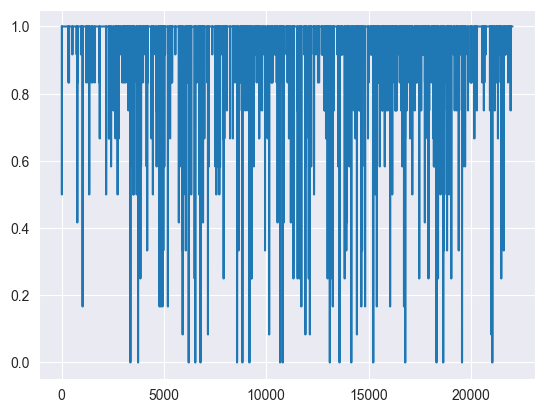

In [19]:
df[df.vegetation_class.isna()]
#new_df[new_df.vegetation_class.isna()].iloc[:, 5:15].max(axis=1)

df[df.sprarse_vegetation > 0.5] #classified as herbaceous_vegetation, which seems to be coherent
test = df['forest'] + df['water'] + df['herbaceous_vegetation'] + df['wetland'] + df['urban'] + df['shrubland'] + df['sprarse_vegetation']
plt.plot(test)

The analysis shows that 'cropland' has not been included in 'vegetation_class'. In 27 missing values, I noticed that the cropland values is always the highest, so all the points belonging to cropland have not been classified and the test above confirms this fact.
I assign the remaining nan values to cropland


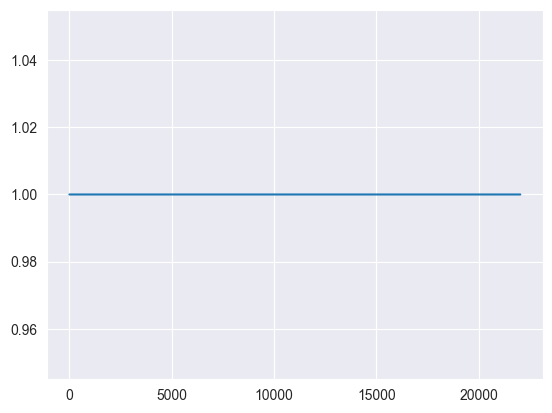

In [20]:
df.loc[df['vegetation_class'].isna(), 'vegetation_class']='cropland'
test = test + df['cropland']
plt.plot(test)


# CORRELATION MATRIX

In [21]:
df.corr() #max_temp and max_max_temp have correlation of 1

C:\Users\David\AppData\Local\Temp\ipykernel_14856\1474707864.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #max_temp and max_max_temp have correlation of 1


,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,Year,max_max_temp,ignition
distance_fire_stations,1.000000,0.380998,0.597202,0.361672,-4.109216e-02,-0.089753,-0.157933,-0.002915,-0.182219,-0.078787,...,0.177206,-0.004632,-0.004945,0.114476,-0.141412,0.024765,-0.243551,-0.008939,-0.104301,-0.228656
distance_rivers,0.380998,1.000000,0.810262,0.511959,-5.275080e-02,-0.072211,-0.393945,-0.002696,-0.246586,-0.300005,...,0.405720,-0.001486,-0.065588,-0.101395,-0.293590,-0.285531,-0.491284,-0.007203,0.044370,-0.218113
distance_roads,0.597202,0.810262,1.000000,0.501996,-7.504581e-02,-0.077587,-0.360746,-0.006670,-0.247274,-0.249587,...,0.346209,-0.005622,-0.042441,-0.018912,-0.255832,-0.185321,-0.461069,-0.010728,-0.024913,-0.268259
distance_powerlines,0.361672,0.511959,0.501996,1.000000,-2.527940e-02,-0.070206,-0.338461,-0.001519,-0.216921,-0.154048,...,0.532158,-0.001569,-0.070887,-0.107333,-0.318020,-0.204134,-0.425787,-0.004821,0.014641,-0.205647
cropland,-0.041092,-0.052751,-0.075046,-0.025279,1.000000e+00,-0.015496,-0.079617,0.006489,-0.016849,0.070603,...,-0.014332,-0.011687,-0.029765,-0.004638,0.016609,-0.002574,-0.085684,-0.012438,0.015766,-0.022591
forest_deciduous_broad,-0.089753,-0.072211,-0.077587,-0.070206,-1.549613e-02,1.000000,-0.076020,0.005804,0.078933,-0.030414,...,-0.072732,-0.006669,0.050575,-0.021822,0.010408,0.009997,0.154313,-0.004491,-0.006093,0.097047
forest_evergreen_broad,-0.157933,-0.393945,-0.360746,-0.338461,-7.961733e-02,-0.076020,1.000000,-0.006621,-0.125350,-0.340918,...,-0.326574,0.009935,0.037423,0.132318,0.300918,0.241640,0.883029,0.014015,-0.037653,0.091934
forest_evergreen_needle,-0.002915,-0.002696,-0.006670,-0.001519,6.489341e-03,0.005804,-0.006621,1.000000,-0.005376,0.007485,...,0.002094,-0.196420,0.001164,-0.017213,-0.007299,-0.003778,-0.007414,-0.335774,0.005497,0.012867
forest_unknown,-0.182219,-0.246586,-0.247274,-0.216921,-1.684900e-02,0.078933,-0.125350,-0.005376,1.000000,0.036437,...,-0.169904,-0.001067,0.052317,-0.024074,0.086875,0.053755,0.313945,0.005237,0.012283,0.214991
herbaceous_vegetation,-0.078787,-0.300005,-0.249587,-0.154048,7.060314e-02,-0.030414,-0.340918,0.007485,0.036437,1.000000,...,-0.183795,-0.003971,0.036581,0.021387,0.063392,0.109559,-0.314575,0.001175,-0.012504,0.061074


max_temp and max_max_temp have correlation of 1: I drop one of them, namely 'max_max_temp'.

In [22]:
df = df.drop('max_max_temp', axis = 1)
#df = df.drop('Year', axis = 1)
df.head()


,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,ignition
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,5.772759,276.253304,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,1
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.0,0.416667,0.166667,...,5.706931,3.610960,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,1
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.0,0.333333,0.000000,...,5.213350,278.800907,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,1
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,6.412321,5.787716,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,1
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.0,0.166667,0.083333,...,4.307997,5.503574,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,1


In [23]:
for column in df:
    print(df[column].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


I've cleaned the dateset, no more NaN values. Now I'm ready to explore a bit my dataset.

# Data Visualization

I start my data visualization and I immediately notice (but it was easily understandable) that we have unbalanced data, so I'll to take this fact into account in my further analysis.

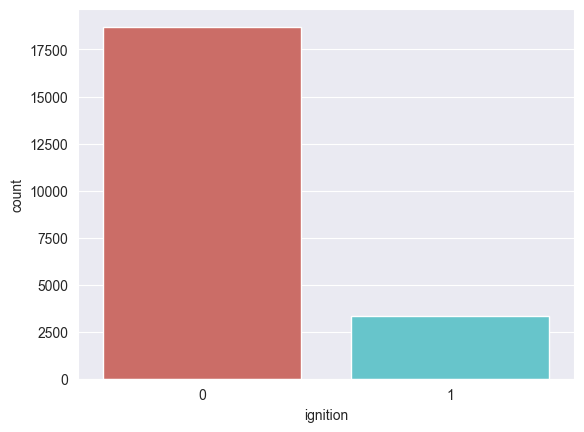

In [24]:
sns.countplot(x='ignition', data = df, palette='hls')
plt.show()
# Of course, we have unbalanced data

From the plot above I can see that I have unbalanced data: I could easily imagine this scenario, since wildfires are common but not so much.

I analyse the mean divided by classes, and I noticed that cropland has no positive ignition points

In [25]:
df.groupby('vegetation_class').mean()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_temp,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,Year,ignition
vegetation_class,,,,,,,,,,,,,,,,,,,,,
cropland,23753.146083,2514.879082,374.055696,24893.709601,0.969136,0.000000,0.003086,-11111.111111,0.003086,0.021605,...,15.326242,6.070765,149.453192,143.755948,75.727395,0.286754,0.882222,0.006173,2010.777778,0.000000
forest,18526.525974,2014.097489,1721.532322,16327.600872,0.001473,0.028895,0.729806,-4765.843068,0.163246,0.057006,...,14.979962,4.680700,159.594150,203.725892,77.035779,0.312894,2.522361,0.921948,2011.360385,0.230228
herbaceous_vegetation,21057.168141,1758.095610,1958.933085,21929.846634,0.025664,0.004912,0.022700,-4154.764996,0.073704,0.833853,...,15.050199,4.892576,158.354867,203.028113,76.437424,0.293744,2.331548,0.101316,2011.279927,0.180473
shrubland,34622.095988,1443.546176,3138.985833,24940.014676,0.000000,0.002525,0.031566,-3030.303030,0.131313,0.213384,...,14.329267,5.194056,131.263297,199.190990,78.844508,0.302875,3.591368,0.165404,2010.015152,0.212121
urban,3577.235167,916.970504,9.259259,4580.158951,0.009259,0.000000,0.029835,-1234.567901,0.118313,0.089506,...,17.796062,4.389587,152.781642,218.993088,72.095301,0.264092,1.282881,0.148148,2010.864198,0.493827
water,31168.006119,12857.755095,10949.901507,50434.428010,0.000082,0.000000,0.002559,-4575.727676,0.001809,0.007195,...,15.297856,7.347565,158.707778,188.595232,74.922307,0.250976,0.324542,0.004368,2011.208683,0.034287
wetland,21005.981497,3157.094735,1409.240733,43386.395271,0.002976,0.000372,0.053571,-5357.142857,0.059524,0.079241,...,15.961747,7.335864,153.664521,174.899189,74.176411,0.235276,1.194865,0.113467,2010.915179,0.294643


### Graphical visualization

Now I want to understand I bit more how data are distributed, in particular distiguishing the two classes og 'ignition'

<Axes: xlabel='vegetation_class'>

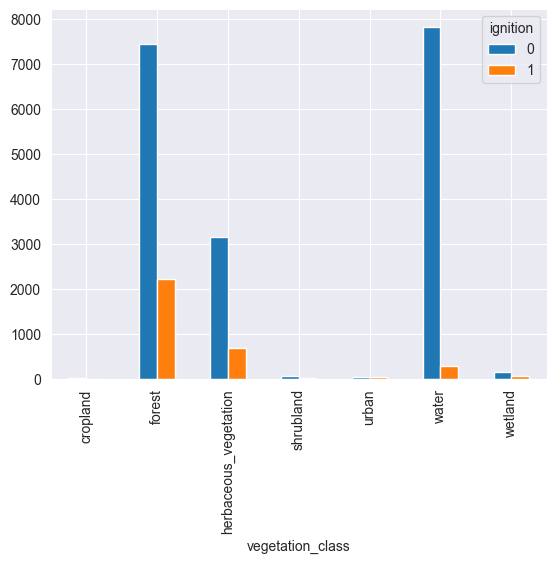

In [26]:
pd.crosstab(df.vegetation_class, df.ignition).plot(kind='bar')

Most common classes: forest, herbaceous_vegetation and water
High dependence on the vegetation_class, so it can have an high relevance on the prediction of ignition points

C:\Users\David\AppData\Local\Temp\ipykernel_14856\47062547.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_temp,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,Year,ignition
distance_fire_stations,1.000000,0.380998,0.597202,0.361672,-4.109216e-02,-0.089753,-0.157933,-0.002915,-0.182219,-0.078787,...,-0.104301,0.177206,-0.004632,-0.004945,0.114476,-0.141412,0.024765,-0.243551,-0.008939,-0.228656
distance_rivers,0.380998,1.000000,0.810262,0.511959,-5.275080e-02,-0.072211,-0.393945,-0.002696,-0.246586,-0.300005,...,0.044370,0.405720,-0.001486,-0.065588,-0.101395,-0.293590,-0.285531,-0.491284,-0.007203,-0.218113
distance_roads,0.597202,0.810262,1.000000,0.501996,-7.504581e-02,-0.077587,-0.360746,-0.006670,-0.247274,-0.249587,...,-0.024913,0.346209,-0.005622,-0.042441,-0.018912,-0.255832,-0.185321,-0.461069,-0.010728,-0.268259
distance_powerlines,0.361672,0.511959,0.501996,1.000000,-2.527940e-02,-0.070206,-0.338461,-0.001519,-0.216921,-0.154048,...,0.014641,0.532158,-0.001569,-0.070887,-0.107333,-0.318020,-0.204134,-0.425787,-0.004821,-0.205647
cropland,-0.041092,-0.052751,-0.075046,-0.025279,1.000000e+00,-0.015496,-0.079617,0.006489,-0.016849,0.070603,...,0.015766,-0.014332,-0.011687,-0.029765,-0.004638,0.016609,-0.002574,-0.085684,-0.012438,-0.022591
forest_deciduous_broad,-0.089753,-0.072211,-0.077587,-0.070206,-1.549613e-02,1.000000,-0.076020,0.005804,0.078933,-0.030414,...,-0.006093,-0.072732,-0.006669,0.050575,-0.021822,0.010408,0.009997,0.154313,-0.004491,0.097047
forest_evergreen_broad,-0.157933,-0.393945,-0.360746,-0.338461,-7.961733e-02,-0.076020,1.000000,-0.006621,-0.125350,-0.340918,...,-0.037653,-0.326574,0.009935,0.037423,0.132318,0.300918,0.241640,0.883029,0.014015,0.091934
forest_evergreen_needle,-0.002915,-0.002696,-0.006670,-0.001519,6.489341e-03,0.005804,-0.006621,1.000000,-0.005376,0.007485,...,0.005497,0.002094,-0.196420,0.001164,-0.017213,-0.007299,-0.003778,-0.007414,-0.335774,0.012867
forest_unknown,-0.182219,-0.246586,-0.247274,-0.216921,-1.684900e-02,0.078933,-0.125350,-0.005376,1.000000,0.036437,...,0.012283,-0.169904,-0.001067,0.052317,-0.024074,0.086875,0.053755,0.313945,0.005237,0.214991
herbaceous_vegetation,-0.078787,-0.300005,-0.249587,-0.154048,7.060314e-02,-0.030414,-0.340918,0.007485,0.036437,1.000000,...,-0.012504,-0.183795,-0.003971,0.036581,0.021387,0.063392,0.109559,-0.314575,0.001175,0.061074


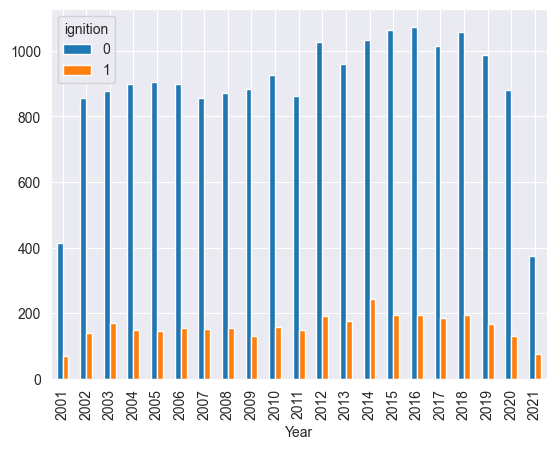

In [27]:
pd.crosstab(df.Year, df.ignition).plot(kind='bar')
df.corr()

We can suppose that the Year has not great relevance in our analysis; it seems to be difficult find a relation between ignition points and Year; moreover, looking at the correlation matrix we can see that it has a very weak correlation with other variables and also the plot above doesn't show any particular pattern, so, for sake of simplicity, I decide to drop also this column

In [28]:
df = df.drop('Year', axis = 1)

Now I want to have a look to the two classes: ignition = 0 vs ignition = 1

In [29]:
data_1=df.loc[df["ignition"] == 1] # I take data where an ignition occurred
data_0=df.loc[df["ignition"] == 0] # I take data where an ignition didn't occurr
data_1.shape # (nrow=3320, ncol=35)
data_0.shape # (nrow=18710, ncol=35)

(18710, 35)

And I plot some variables, in particular the 'categorical' to see distribution of 0's and 1's.

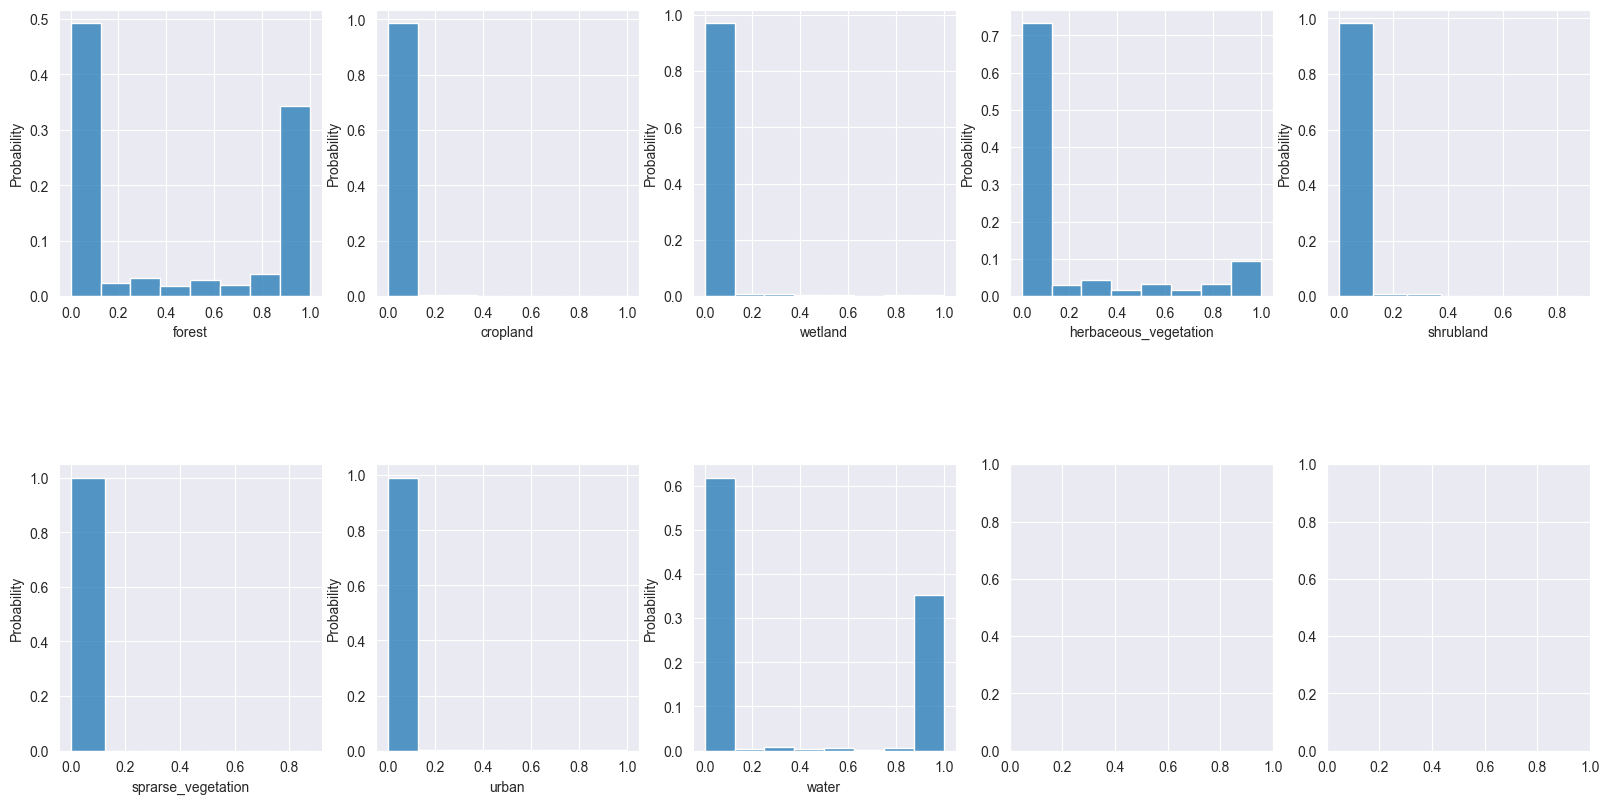

In [30]:
cat = ["forest","cropland","wetland","herbaceous_vegetation","shrubland","sprarse_vegetation","urban","water"]
cat_plot=df[["forest","cropland","wetland","herbaceous_vegetation","shrubland","sprarse_vegetation","urban","water"]]
fig, axes = plt.subplots(2, 5,figsize=[16,8])
axes = axes.flatten()
fig.tight_layout(h_pad=10)
i=0
for x in cat_plot.columns:
    sns.histplot(data=cat_plot, x=x, stat ='probability' , ax=axes[i], binwidth=1/8 ,bins=20)
    i=i+1
plt.show()

In [31]:
features = df.columns.to_list()
#features

attributes = [ 'distance_fire_stations',  'distance_rivers',
 'distance_roads',
 'distance_powerlines', 'aspect',
 'elevation',
 'pop_dens',
 'slope',
 'anom_max_temp',
 'anom_max_wind_vel',
 'anom_avg_temp',
 'anom_avg_rel_hum',
 'anom_avg_soil',
 'anom_sum_prec',
 'max_temp',
 'max_wind_vel',
 'avg_temp',
 'avg_wind_angle',
 'avg_rel_hum',
 'avg_soil',
 'sum_prec']

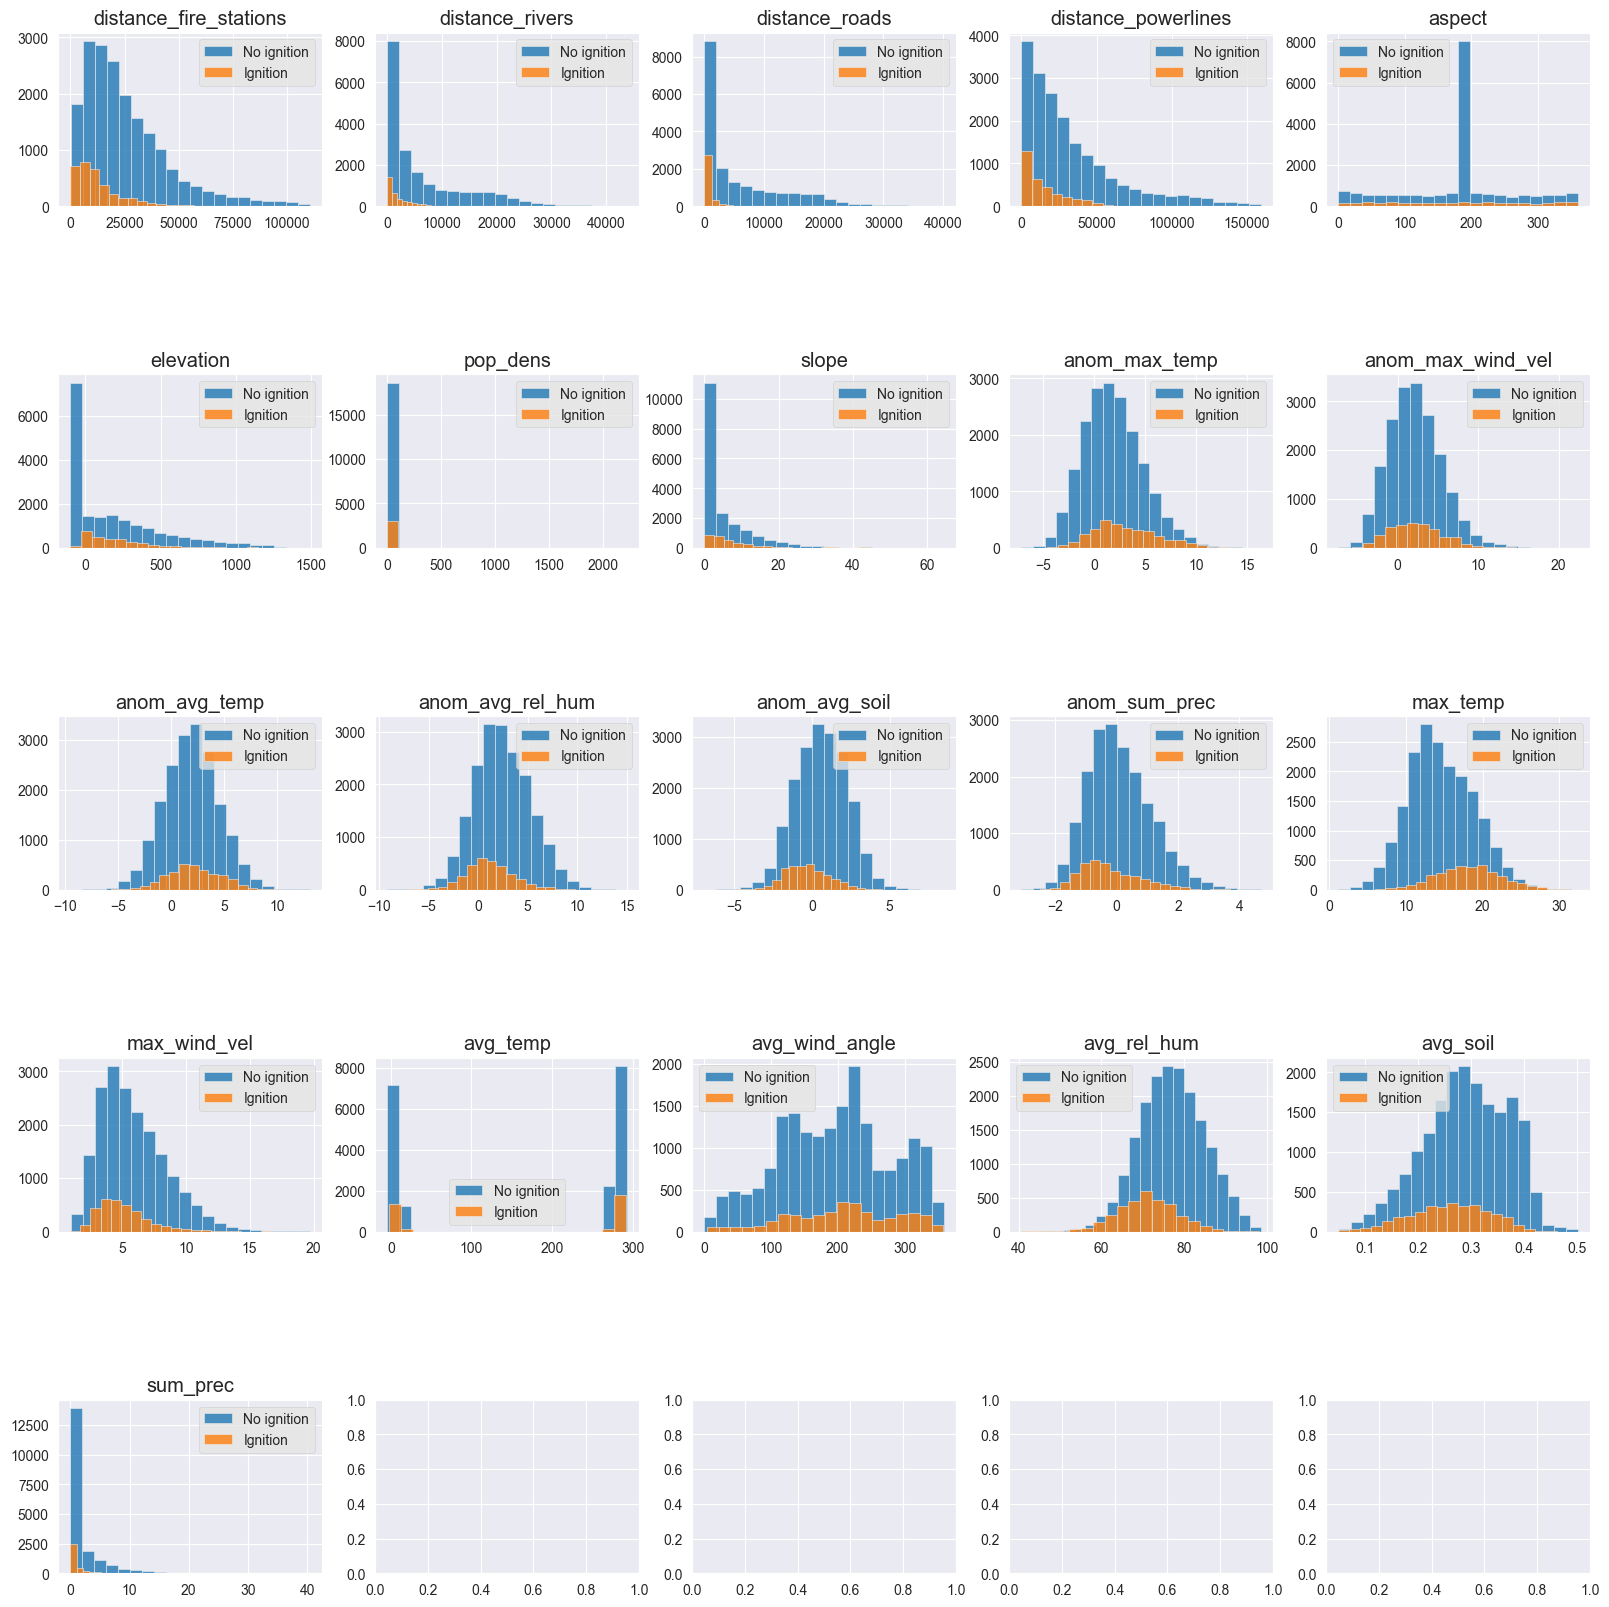

In [32]:
fig, axes = plt.subplots(5, 5,figsize=[16,16])
axes = axes.flatten()
fig.tight_layout(h_pad=10)
plt.style.use("ggplot")

i=0
for x in attributes:
    plt.sca(axes[i]) # set the current Axes
    plt.title(x)
    plt.hist(data_0[x], bins=20,  alpha=0.8, label='No ignition')
    plt.hist(data_1[x], bins=20,  alpha=0.8, label='Ignition')
    i=i+1
    plt.legend()
plt.show()

Of course, we have much more 'No ignition' data, but the distribution is similar among the two classes.

 I want to see if applying some transformation I can change the distribution of my data

In [33]:
save_df = df # I save the original dataframe before applying transformations
save_df.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_temp,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,ignition
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,16.973520,5.772759,276.253304,225.773605,56.837185,0.297854,0.360376,1.000000,forest,1
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.0,0.416667,0.166667,...,15.993032,5.706931,3.610960,209.708847,61.120739,0.264534,0.020176,0.833333,forest,1
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.0,0.333333,0.000000,...,17.455698,5.213350,278.800907,76.341278,63.017559,0.208871,0.025395,1.000000,forest,1
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,15.774510,6.412321,5.787716,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,1
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.0,0.166667,0.083333,...,20.872498,4.307997,5.503574,316.951508,56.103680,0.208831,0.119717,0.916667,forest,1


array([[<Axes: title={'center': 'distance_fire_stations'}>,
        <Axes: title={'center': 'logdist'}>,
        <Axes: title={'center': 'max_wind_vel'}>,
        <Axes: title={'center': 'logmax_wind'}>,
        <Axes: title={'center': 'distance_powerlines'}>],
       [<Axes: title={'center': 'logdist_power'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'logslope'}>,
        <Axes: title={'center': 'logdist_river'}>,
        <Axes: title={'center': 'distance_rivers'}>]], dtype=object)

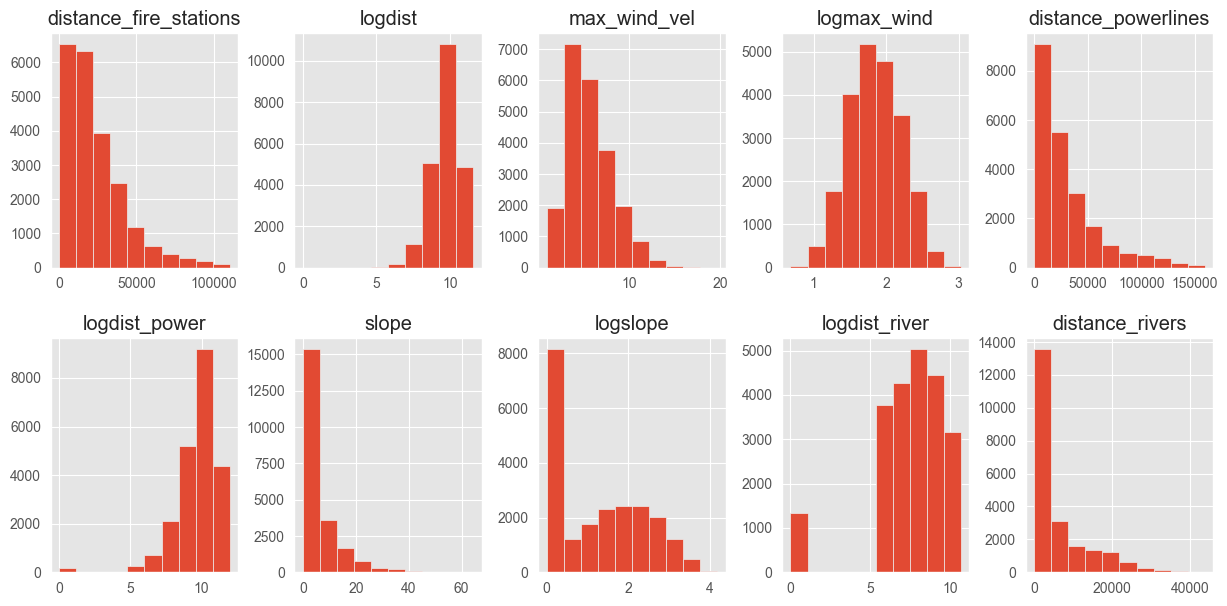

In [34]:

import math
pd.options.mode.chained_assignment = None # no warning on creating a new column

df['logdist']=df['distance_fire_stations'].apply(lambda x: math.log(x+1))
df['logmax_wind']=df['max_wind_vel'].apply(lambda x: math.log(x+1))
df['logdist_power']=df['distance_powerlines'].apply(lambda x: math.log(x+1))
df['logslope']=df['slope'].apply(lambda x: math.log(x+1))
df['logdist_river']=df['distance_rivers'].apply(lambda x: math.log(x+1))


#df['logawind_vel']=df['anom_max_wind_vel'].apply(lambda x: math.log(x+1))
#num['logtemperature']=(num['temperature']+273.15).apply(lambda x: math.log(x+1))
df[['distance_fire_stations','logdist',
     'max_wind_vel','logmax_wind',
     'distance_powerlines','logdist_power',
     'slope', 'logslope',
     'logdist_river','distance_rivers'
    # 'logtemperature','temperature'
    ]].hist(layout=(2,5), figsize=(15,7))

With logarithm transformation I manage to have gaussian distributed data for 'max_wind_vel'.

I'll have a look to the distribution in 0 and 1 classes of 'ignition'.

I recover the original df, changing the max_wind_vel for logwind_vel

In [35]:
df = df.drop( 'logdist', axis=1)
df = df.drop( 'max_wind_vel', axis=1) #I keep logmax_wind
df = df.drop( 'logdist_power', axis=1)
df = df.drop( 'logslope', axis=1)
df = df.drop( 'logdist_river', axis=1)

In [36]:
df.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_temp,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,ignition,logmax_wind
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,16.973520,276.253304,225.773605,56.837185,0.297854,0.360376,1.000000,forest,1,1.912909
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.0,0.416667,0.166667,...,15.993032,3.610960,209.708847,61.120739,0.264534,0.020176,0.833333,forest,1,1.903141
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.0,0.333333,0.000000,...,17.455698,278.800907,76.341278,63.017559,0.208871,0.025395,1.000000,forest,1,1.826700
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,15.774510,5.787716,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,1,2.003144
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.0,0.166667,0.083333,...,20.872498,5.503574,316.951508,56.103680,0.208831,0.119717,0.916667,forest,1,1.669215


Now I divide into 0 and 1 of ignition in order to understand the distribution of vegetation_class, which is more or less what I did before with the histograms.

In [39]:
data_0 = data_0[['vegetation_class', 'ignition']]
data_1 = data_1[['vegetation_class', 'ignition']]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


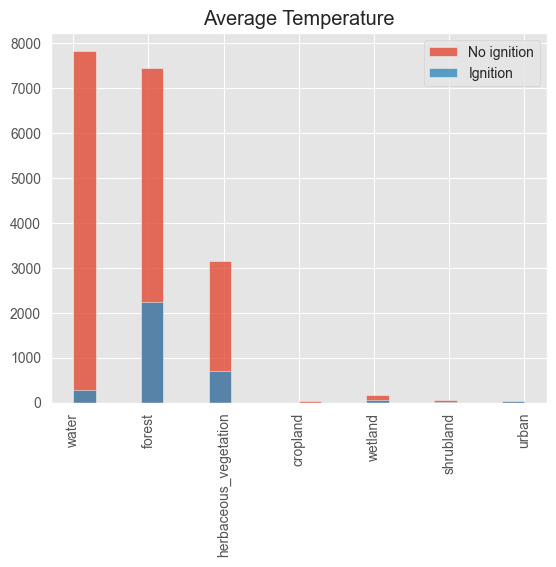

In [40]:
plt.legend()
plt.style.use("ggplot")
plt.title("Average Temperature")
plt.xticks(rotation = 90)
plt.hist(data_0["vegetation_class"], bins=20, alpha=0.8, label='No ignition')
plt.hist(data_1["vegetation_class"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

The plot above confirms the fact that the most present classes are 'water', 'forest' and 'herbaceous_vegetation'. Data can be consistent with intuition, indeed we can imagine that forest

In [41]:
data_0.loc[data_0.vegetation_class == 'urban'] #41
data_1.loc[data_1.vegetation_class == 'urban'] #40
data_0.loc[data_0.vegetation_class == 'shrubland'] #52
data_1.loc[data_1.vegetation_class == 'shrubland'] #14
data_0.loc[data_0.vegetation_class == 'wetland'] #158
data_1.loc[data_1.vegetation_class == 'wetland'] #66
data_0.loc[data_0.vegetation_class == 'cropland'] #27
data_1.loc[data_1.vegetation_class == 'cropland'] #0: No ignition points in cropland areas
data_0.loc[data_0.vegetation_class == 'forest'] #7446
data_1.loc[data_1.vegetation_class == 'forest'] #2227
data_0.loc[data_0.vegetation_class == 'herbaceous_vegetation'] #3156
data_1.loc[data_1.vegetation_class == 'herbaceous_vegetation'] #695
data_0.loc[data_0.vegetation_class == 'water'] #7830
data_1.loc[data_1.vegetation_class == 'water'] #278

,vegetation_class,ignition
145,water,1
188,water,1
199,water,1
200,water,1
282,water,1
...,...,...
3160,water,1
3161,water,1
3176,water,1
3178,water,1


### Correlation matrix
I visualize the correlation matrix, firstly considering the relation with 'ignition' and then with all the variables.

C:\Users\David\AppData\Local\Temp\ipykernel_14856\2252110568.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

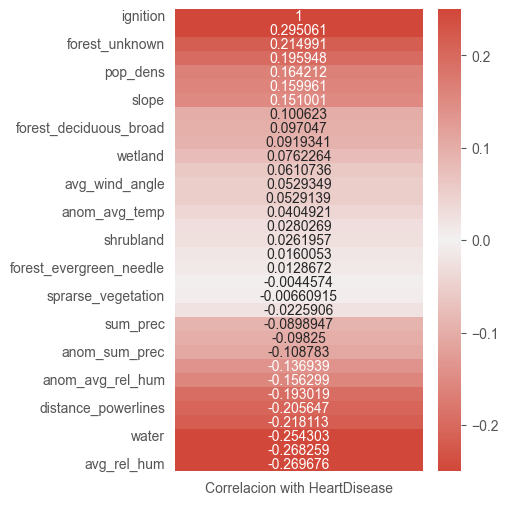

In [42]:
plt.figure(figsize=(4, 6))
correlation = df.corr()
a = correlation['ignition']
cmap = sns.diverging_palette(15, 15, as_cmap=True)
one_column = pd.DataFrame({"Correlacion with HeartDisease": a[1:]},
                  index=a.index[1:])
corrHD=one_column.sort_values(by='Correlacion with HeartDisease', ascending = False)
sns.heatmap(corrHD,vmin=-0.25, vmax=0.25, annot=True, fmt="g", cmap=cmap, center=0)

While here I take the whole correlation matrix, without the 'vegetation_class' and the 'ignition'; while below I consider also the 'ignition' column. It's interesting to see the more correlated variables.

C:\Users\David\AppData\Local\Temp\ipykernel_14856\3491765697.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df.drop('vegetation_class', 1)
C:\Users\David\AppData\Local\Temp\ipykernel_14856\3491765697.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('ignition', 1)


<Axes: >

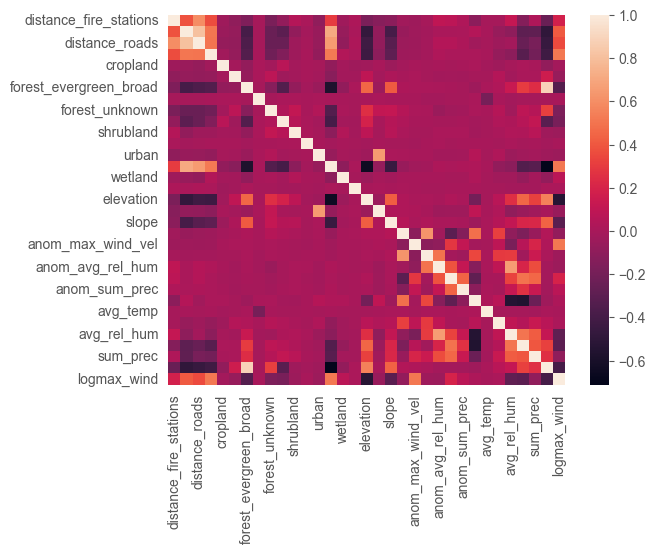

In [43]:
df1 = df.drop('vegetation_class', 1)
df1 = df1.drop('ignition', 1)
#df1 = abs(df1)
corr1=df1.corr()
sns.heatmap(corr1)

C:\Users\David\AppData\Local\Temp\ipykernel_14856\74369420.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df.drop('vegetation_class', 1)


<Axes: >

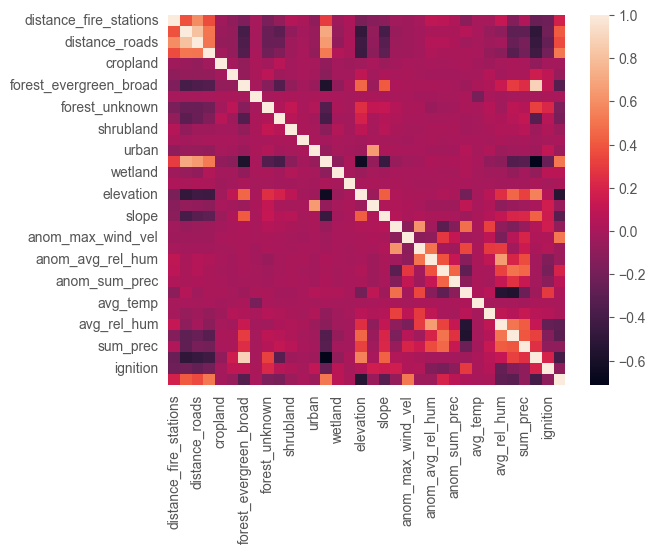

In [44]:
df1 = df.drop('vegetation_class', 1)
corr2 = df1.corr()
sns.heatmap(corr2)

I want to see now the more correlated variables, both with 'ignition' and with others. I select the 5 highest values and the related variables below.

In [45]:
corr2["ignition"].sort_values()

avg_rel_hum               -0.269676
distance_roads            -0.268259
water                     -0.254303
distance_fire_stations    -0.228656
distance_rivers           -0.218113
distance_powerlines       -0.205647
anom_avg_soil             -0.193019
anom_avg_rel_hum          -0.156299
avg_soil                  -0.136939
anom_sum_prec             -0.108783
logmax_wind               -0.098250
sum_prec                  -0.089895
cropland                  -0.022591
sprarse_vegetation        -0.006609
aspect                    -0.004457
forest_evergreen_needle    0.012867
avg_temp                   0.016005
shrubland                  0.026196
anom_max_wind_vel          0.028027
anom_avg_temp              0.040492
elevation                  0.052914
avg_wind_angle             0.052935
herbaceous_vegetation      0.061074
wetland                    0.076226
forest_evergreen_broad     0.091934
forest_deciduous_broad     0.097047
urban                      0.100623
slope                      0

In [46]:
arr=abs(corr1.unstack()).sort_values(ascending=False) #tomo los valores absolutos de la matrix en una sola columna, ordino decrescente
pd.set_option('display.max_rows', 1000)
arr= arr[arr!=1]
#Claramente tendrè valores doble, porque la matriz es simmetrica
#Tomar las 5 mas relaccionadas significa elegir las filas: 0,2,4,6,8
top5=arr[0:9:2]
top5


forest          forest_evergreen_broad    0.883029
distance_roads  distance_rivers           0.810262
forest          water                     0.711197
water           distance_rivers           0.711018
avg_rel_hum     anom_avg_rel_hum          0.658674
dtype: float64

Clearly, since forest is the sum of all 'forest' values, there is high correlation with forest_evergreen_broad, but this was easy to imagine. Other correlated variables are distance_roads and distance_rivers and we can enforce the result also thanks to the plot below: there is a linear dependence between them.
For the moment I decided to keep all the variables and then I will perform a feature selection the reduce the total number.

<Axes: xlabel='forest', ylabel='forest_evergreen_broad'>

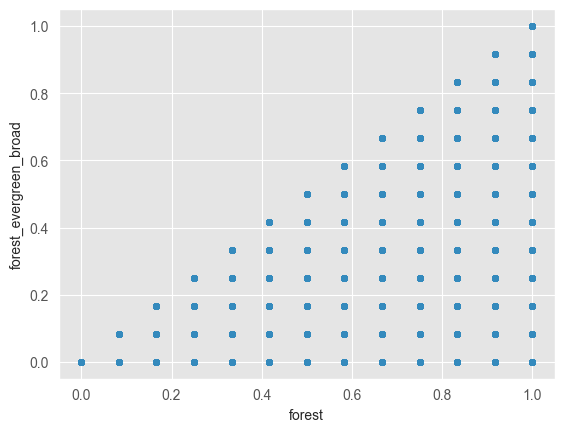

In [47]:
top2corr = df[["forest_evergreen_broad", "forest"]] #creo un dataframe con solo las dos mas correlacionadas
top2corr.plot.scatter(x="forest", y="forest_evergreen_broad") #hago el scatterplot con el comando .plot.scatter

<Axes: xlabel='distance_roads', ylabel='distance_rivers'>

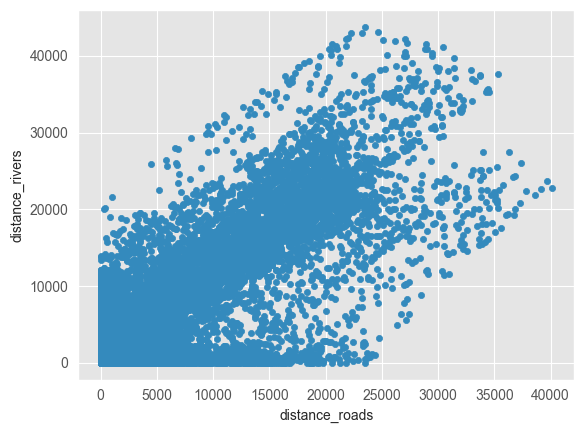

In [48]:
top2corr = df[["distance_roads", "distance_rivers"]] #creo un dataframe con solo las dos mas correlacionadas
top2corr.plot.scatter(x="distance_roads", y="distance_rivers") #hago el scatterplot con el comando .plot.scatter

<Axes: xlabel='water', ylabel='forest'>

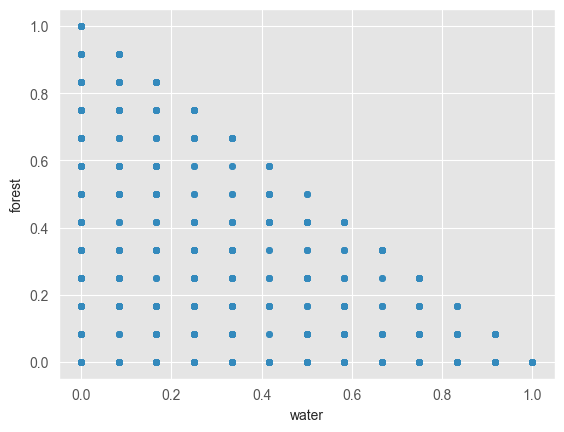

In [49]:
top2corr = df[["water", "forest"]]  #creo un dataframe con solo las dos mas correlacionadas
top2corr.plot.scatter(x="water", y="forest")  #hago el scatterplot con el comando .plot.scatter


<Axes: xlabel='distance_rivers', ylabel='water'>

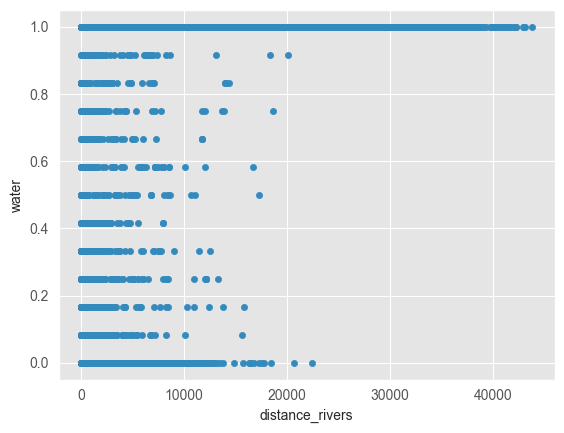

In [50]:
top2corr = df[["distance_rivers", "water"]]
top2corr.plot.scatter(x="distance_rivers", y="water")

I'm almost ready to perform my classification, I need to create dummy variables for my 'vegetation_class' and add them to my dataset.

In [51]:
pd.get_dummies(df.vegetation_class)

,cropland,forest,herbaceous_vegetation,shrubland,urban,water,wetland
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
22030,0,0,0,0,0,1,0
22031,0,1,0,0,0,0,0
22032,0,1,0,0,0,0,0
22033,0,0,0,0,0,1,0


In [52]:
dummy=pd.get_dummies(df.vegetation_class)
dummy.rename(columns={'cropland': 'cropland_dummy', 'forest': 'forest_dummy', 'herbaceous_vegetation': 'herbaceous_vegetation_dummy', 'shrubland': 'shrubland_dummy', 'urban': 'urban_dummy', 'water': 'water_dummy',
                      'wetland': 'wetland_dummy'}, inplace=True)
#dummy.head()
df1=df.join(dummy)
df1

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,vegetation_class,ignition,logmax_wind,cropland_dummy,forest_dummy,herbaceous_vegetation_dummy,shrubland_dummy,urban_dummy,water_dummy,wetland_dummy
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,forest,1,1.912909,0,1,0,0,0,0,0
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.0,0.416667,0.166667,...,forest,1,1.903141,0,1,0,0,0,0,0
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.0,0.333333,0.000000,...,forest,1,1.826700,0,1,0,0,0,0,0
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,wetland,1,2.003144,0,0,0,0,0,0,1
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.0,0.166667,0.083333,...,forest,1,1.669215,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22030,12260.199835,1820.027472,500.000000,39374.007924,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,water,0,1.956947,0,0,0,0,0,1,0
22031,8933.784193,3889.087297,790.569415,40380.998006,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,forest,0,1.895938,0,1,0,0,0,0,0
22032,56560.255480,1030.776406,6388.466170,23538.532240,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,forest,0,1.853793,0,1,0,0,0,0,0
22033,94191.294715,16839.314119,14637.281168,83236.485390,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,water,0,2.406165,0,0,0,0,0,1,0


Last step before the classification is to drop the 'vegetation_class', since I created the dummy variables and I don't need it anymore. I also sample the dataset in order to randomize the occurrence of ignition points, in the original dataset they are ordered.

In [53]:
df1 = df1.drop('vegetation_class', 1)
df1=df1.sample(frac=1) # I sample the data since ignition points are not randomly divided

C:\Users\David\AppData\Local\Temp\ipykernel_14856\3947938703.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('vegetation_class', 1)


In [54]:
df2 = df.drop('vegetation_class', 1)
df.shape # (22030, 35)
df1.shape # (22030, 41)


C:\Users\David\AppData\Local\Temp\ipykernel_14856\3409415209.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df.drop('vegetation_class', 1)


(22030, 41)

- df is the original dataset, without dummy variables.
- df1 is the dataset with dummy variables and without vegetation_class
- df2 is the 'df' dataset without 'vegetation_class' since I already stored in 'dummy' the dummy variables.

# PCA

I'll perform a PCA analysis in order to see if I can drastically reduce the dimensionality.
First of all I'll have a look to my data and I will re-scale them if needed and then I'll apply the PCA.

<Axes: >

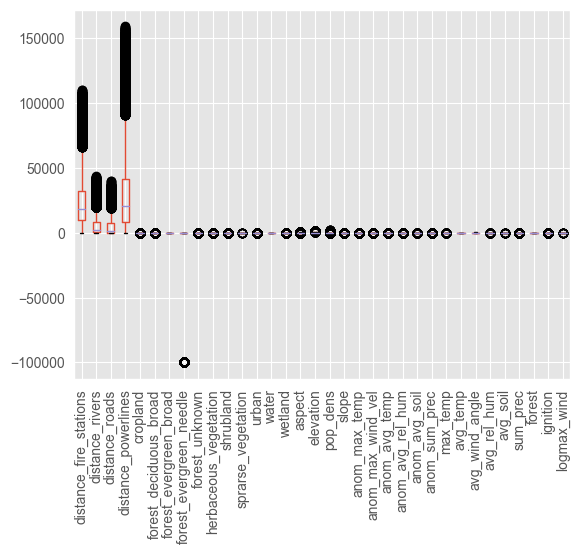

In [55]:
df.boxplot(rot=90)

<Axes: >

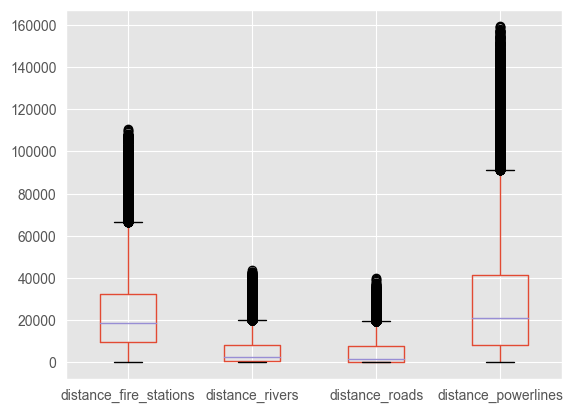

In [56]:
df[['distance_fire_stations', 'distance_rivers', 'distance_roads', 'distance_powerlines']].boxplot()

to properly apply PCA analysis standardization is required


I recover

In [57]:
#for column in dummy.columns:
#    print(sum(dummy[column].isna()))

In [58]:
df1.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,forest,ignition,logmax_wind,cropland_dummy,forest_dummy,herbaceous_vegetation_dummy,shrubland_dummy,urban_dummy,water_dummy,wetland_dummy
12877,6490.377493,250.000000,790.569415,2250.000000,0.0,0.0,0.250000,0.0,0.333333,0.416667,...,0.583333,0,2.038948,0,1,0,0,0,0,0
17500,33832.307045,14769.055488,12747.548784,144627.106726,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0,2.158737,0,0,0,0,0,1,0
2338,10606.601718,2304.886114,1000.000000,31225.990777,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,1.000000,1,2.000809,0,1,0,0,0,0,0
7868,9620.940702,1118.033989,2000.000000,6708.203932,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,1.000000,0,1.434325,0,1,0,0,0,0,0
7637,500.000000,790.569415,250.000000,7762.087348,0.0,0.0,0.166667,0.0,0.833333,0.000000,...,1.000000,0,1.880570,0,1,0,0,0,0,0


In [59]:
X_pca = df1.loc[:, df1.columns != 'ignition']
y_pca = df1.loc[:, df1.columns == 'ignition']

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_pca) # No target
scaled_num = pd.DataFrame(scaler.transform(X_pca))
scaled_num.columns = X_pca.columns
scaled_num.tail()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,sum_prec,forest,logmax_wind,cropland_dummy,forest_dummy,herbaceous_vegetation_dummy,shrubland_dummy,urban_dummy,water_dummy,wetland_dummy
22025,-1.059152,-0.760666,-0.671894,-0.060594,-0.110905,-0.153646,1.555935,0.219202,-0.455086,-0.537461,...,0.148571,1.258452,0.295616,-0.03503,1.130254,-0.460258,-0.054817,-0.060748,-0.763143,-0.101353
22026,-0.938072,-0.793931,-0.707997,-0.908106,-0.110905,-0.153646,-0.752945,0.219202,-0.017500,1.251602,...,-0.514875,-0.752432,-2.018723,-0.03503,-0.884757,2.172692,-0.054817,-0.060748,-0.763143,-0.101353
22027,0.825489,2.200071,2.407027,2.505693,-0.110905,-0.153646,-0.752945,0.219202,-0.455086,-0.537461,...,-0.514875,-0.935240,0.884339,-0.03503,-0.884757,-0.460258,-0.054817,-0.060748,1.310370,-0.101353
22028,1.639105,-0.793931,0.848127,0.775755,-0.110905,-0.153646,-0.752945,0.219202,-0.455086,2.529504,...,1.082458,-0.935240,-0.471721,-0.03503,-0.884757,2.172692,-0.054817,-0.060748,-0.763143,-0.101353
22029,0.457371,2.112302,1.643354,1.496206,-0.110905,-0.153646,-0.752945,0.219202,-0.455086,-0.537461,...,-0.514875,-0.935240,0.595648,-0.03503,-0.884757,-0.460258,-0.054817,-0.060748,1.310370,-0.101353


<Axes: >

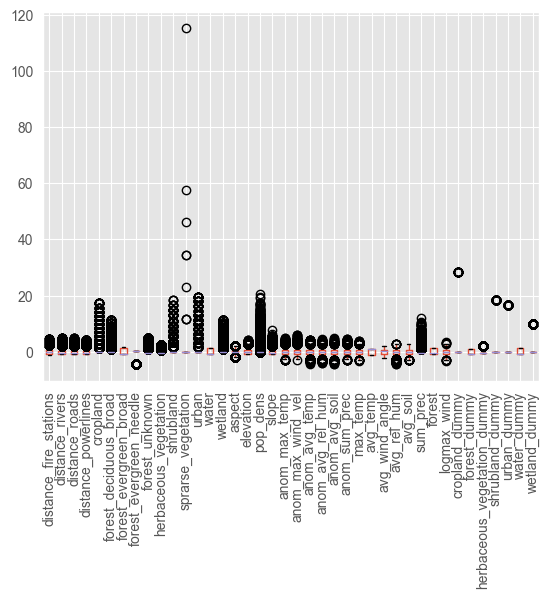

In [61]:
scaled_num.boxplot(rot=90)

I scaled my dataset so now all the columns lies more or less in the same range of values, however, there are still some outliers in 'sprarse_vegetation'.

In [62]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_num)

PCA()

In [63]:
#let's use the pca to transform the dataset
num_pca = pd.DataFrame(pca.transform(scaled_num))
#num_pca.columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
num_pca

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-1.471076,1.028707,-0.171517,0.195281,-2.992141,-0.042602,-0.505024,0.831923,-0.145782,0.659618,...,0.149440,-0.142580,0.054801,0.039542,-0.197128,0.972213,-0.000402,-2.207058e-16,-7.137224e-16,2.921116e-16
1,4.529656,0.759259,-0.929996,-0.410497,0.570743,0.043775,0.071988,0.217199,0.032251,-0.582087,...,-0.278765,-0.148725,0.031300,-0.036971,0.384879,-0.077577,-0.001931,-4.052370e-16,2.438450e-16,4.032423e-16
2,-1.979002,0.137756,-1.702518,0.108748,-2.069810,0.102140,-0.434077,0.538751,-0.019140,-1.189220,...,0.032182,-0.056484,0.020661,-0.020246,0.111054,-0.084517,0.008477,8.201283e-16,-1.586108e-16,-1.449551e-15
3,-2.812158,-0.289398,-1.046134,-0.578491,5.626328,0.734221,-0.862849,-0.083159,0.443936,0.090548,...,0.023836,-0.467349,-0.110669,-0.058176,0.928661,-0.180606,0.011125,4.731836e-16,5.075230e-16,-9.638282e-16
4,-2.373753,3.125222,-1.341542,-0.788927,1.473861,0.125598,-0.113849,0.919481,-0.093880,1.911237,...,0.398888,-0.101290,0.076465,0.104932,-0.175265,-0.401774,0.023323,4.593058e-16,-2.696331e-16,-1.546695e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22025,-1.903739,-0.249011,-1.408571,0.389647,-1.408018,0.261394,-0.826470,0.746920,0.005219,-0.288514,...,-0.134307,-0.200931,-0.003393,0.077232,-0.416286,0.002306,0.029319,8.201283e-16,-1.586108e-16,-1.220567e-15
22026,-0.534689,5.174860,2.375010,-2.020829,1.098431,1.477381,0.064149,-1.097757,-0.711386,-0.404236,...,-0.528488,0.960004,-2.560857,0.151917,0.131809,-0.487154,-0.101926,-4.080559e-16,-9.912781e-16,5.696673e-16
22027,4.844862,-0.978193,-0.813855,0.162528,0.538424,0.079334,-0.004990,0.290864,0.054345,-0.493447,...,-0.218993,-0.230177,-0.122430,0.024617,-0.082255,0.015092,0.016136,4.968192e-16,4.658896e-16,1.811977e-16
22028,0.335466,-1.173011,3.588918,-0.531254,-0.220126,-0.810242,0.252105,-0.641701,-0.792562,-1.377318,...,-0.435709,-0.677652,-0.218510,0.044219,-0.023823,0.241949,0.038028,4.662447e-16,-1.030997e-16,8.611009e-16


In [64]:
pd.DataFrame(pca.explained_variance_).transpose()


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,7.082149,3.222743,2.930447,2.348149,2.275502,1.931855,1.70325,1.658458,1.566112,1.20513,...,0.175799,0.145765,0.141761,0.125962,0.106898,0.094314,0.012373,1.396708e-30,9.965844e-32,9.563810e-32


         0         1         2         3         4         5         6   \
0  0.177046  0.080565  0.073258  0.058701  0.056885  0.048294  0.042579   

        7         8         9   ...        30        31        32        33  \
0  0.04146  0.039151  0.030127  ...  0.004395  0.003644  0.003544  0.003149   

         34        35        36            37            38            39  
0  0.002672  0.002358  0.000309  3.491611e-32  2.491348e-33  2.390844e-33  

[1 rows x 40 columns]


C:\Users\David\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


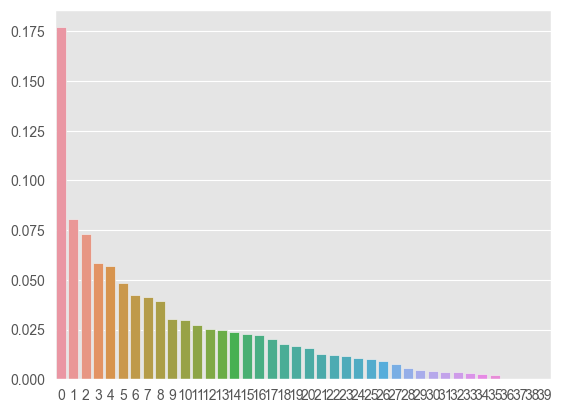

In [65]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca.explained_variance_ratio_).transpose()
print(explained_var)
ax = sns.barplot( data=explained_var)

C:\Users\David\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


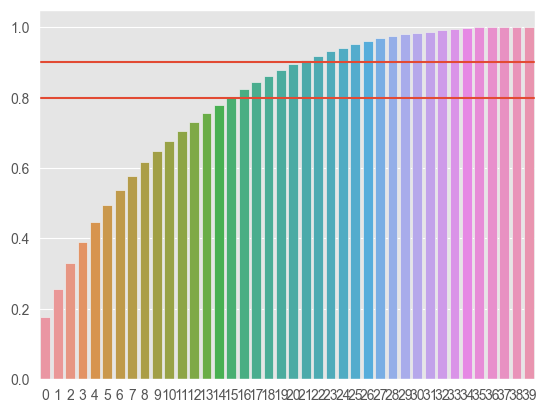

In [66]:
cum_explained_var=np.cumsum(pca.explained_variance_ratio_)
cum_explained_var= pd.DataFrame(cum_explained_var).transpose()
#cum_explained_var
ax = sns.barplot(data=cum_explained_var)
ax.axhline(0.9)
ax.axhline(0.8)

Through PCA, I don't achieve to drastically reduce the dimensionality. I still have to take into account around 15-20 variables, so it's not a great improvement.
Better to follow the 'original' path and try to select the best features.


---

---
# Classification

In [67]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import time

First of all, I scale data with StandardScaler, in order to translate the feature between 0 and 1. I could have used also MinMax Scaler, but I noticed that I would obtain much more outliers. Since we have very different scales between data, I preferred to scale them before continuing in my analysis.
Be aware, I will scale only numerical data and not the dummy variables.

In [66]:
#for col in dummy.columns:
#    print(sum(dummy[col].isna()))
#dummy.iloc[8031,:]

In [79]:
X_original = df2.loc[:, df2.columns != 'ignition']
y_original = df2.loc[:, df2.columns == 'ignition']

Now I have to consider three elements:
- Split Dataset: I have to divide my dataset into train and test
- Standardization: I have to standardize the variables, and I will do it with StandardScaler();
- Dummy variables: I also have to add the dummy variables, but these must not be standardized;

So the next steps are:
1. I add the dummy variables to my dataset;
2. I split my dataset into train and test;
3. I standardize only the numerical variables, not the dummy ones.


1. Add dummy variables to X:

In [80]:
X_original_complete = X_original.join(dummy)

2. Split dataset:

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_original_complete, y_original, test_size=0.3, random_state=0)

3. Standardize only numerical variables:

In [83]:
scaler_train = StandardScaler().fit(X_train[X_original.columns])
X_train[X_original.columns] = scaler_train.transform(X_train[X_original.columns])

scaler_test = StandardScaler().fit(X_test[X_original.columns])
X_test[X_original.columns] = scaler_test.transform(X_test[X_original.columns])

In [84]:
X_train.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,sum_prec,forest,logmax_wind,cropland_dummy,forest_dummy,herbaceous_vegetation_dummy,shrubland_dummy,urban_dummy,water_dummy,wetland_dummy
233,0.397705,-0.795464,-0.453984,-0.683534,-0.110431,-0.149651,-0.750892,0.215933,-0.456729,2.522733,...,-0.461388,-0.934790,-1.146780,0,0,1,0,0,0,0
13503,1.064130,1.005891,0.135124,0.376231,-0.110431,-0.149651,-0.750892,0.215933,-0.456729,-0.539034,...,-0.516237,-0.934790,0.699081,0,0,0,0,0,1,0
13600,-0.630722,1.575115,0.580551,-0.268920,-0.110431,-0.149651,-0.750892,0.215933,-0.456729,-0.539034,...,-0.516237,-0.934790,1.058198,0,0,0,0,0,1,0
18362,0.803368,-0.690047,-0.210264,-0.247355,-0.110431,-0.149651,1.557621,0.215933,-0.456729,-0.539034,...,4.210660,1.260531,0.035520,0,1,0,0,0,0,0
16805,0.036952,-0.762128,-0.031630,-0.094447,-0.110431,0.841659,-0.750892,0.215933,3.870370,-0.283887,...,-0.483423,1.077588,-0.469727,0,1,0,0,0,0,0


In [85]:
X_test.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,sum_prec,forest,logmax_wind,cropland_dummy,forest_dummy,herbaceous_vegetation_dummy,shrubland_dummy,urban_dummy,water_dummy,wetland_dummy
10844,0.636017,1.900771,2.048879,0.216490,-0.112117,-0.162861,-0.757750,0.22668,-0.451427,-0.533790,...,-0.512510,-0.936295,0.314446,0,0,0,0,0,1,0
20819,-1.089455,-0.757292,-0.617756,-0.964807,-0.112117,-0.162861,1.552022,0.22668,-0.451427,-0.533790,...,1.193344,1.253622,-0.472483,0,1,0,0,0,0,0
17679,0.634824,3.711325,1.236334,1.571760,-0.112117,-0.162861,-0.757750,0.22668,-0.451427,-0.533790,...,-0.512510,-0.936295,0.521744,0,0,0,0,0,1,0
12961,3.545344,2.010887,1.996630,2.129664,-0.112117,-0.162861,-0.757750,0.22668,-0.451427,-0.533790,...,-0.512510,-0.936295,-0.979817,0,0,0,0,0,1,0
12658,-0.617537,-0.077378,-0.633838,-0.794017,-0.112117,1.551070,0.012174,0.22668,1.347475,-0.020578,...,0.470118,0.888635,0.094451,0,1,0,0,0,0,0


### Oversampling

As I pointed above, I have unbalanced data and this could represent a problem, because, absurdly, classifying all data to 0, I could reach, maybe, acceptable result in terms of metrics, but I would completely miss the aim of the work.
For this reason, the next step will be 'cover this gap', namely I over-sample using the SMOTE function, which, instead of creating copies from the 'ignition=1'-class (the minor class), will create synthetic samples from it.
Be careful! I will oversample only over the training data, because it is the part that I need for my model and none of the information in the test data is being used to create synthetic observations.

In [86]:
os = SMOTE(random_state=0)
X_train_os, y_train_os = os.fit_resample(X_train, y_train)

In [87]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(X_train_os))
print("Number of no subscription in oversampled data",len(y_train_os[y_train_os['ignition']==0]))
print("Number of subscription",len(y_train_os[y_train_os['ignition']==1]))
print("Proportion of no subscription data in oversampled data is ",len(y_train_os[y_train_os['ignition']==0])/len(X_train_os))
print("Proportion of subscription data in oversampled data is ",len(y_train_os[y_train_os['ignition']==1])/len(X_train_os))

length of oversampled data is  26192
Number of no subscription in oversampled data 13096
Number of subscription 13096
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


---

Now I'm ready to test different classificator; I'll start with Support Vector Machine:

## SVM

First of all I'll make an analysis to find the best parameter:

In [117]:
start=time.time()
svcL = svm.SVC(kernel='linear')
parameters = {'C':[0.0001,0.001,0.1]}
clfL = GridSearchCV(svcL,parameters)
print(clfL)
aL=clfL.fit(X_train_os,y_train_os.values.ravel())
y_predL=aL.predict(X_test)
TimeL=time.time() - start
print("%s seconds" % (time.time() - start))
print("Best hyperparameter:",clfL.best_params_)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.1]})
254.18572616577148 seconds
Best hyperparameter: {'C': 0.1}


Best hyperparameter: C = 0.1. Very low performance, 254 sec, more than 4 minutes. It also depends on the instrument.

Accuracy: 0.7822666061431381
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      5614
           1       0.40      0.85      0.54       995

    accuracy                           0.78      6609
   macro avg       0.68      0.81      0.70      6609
weighted avg       0.88      0.78      0.81      6609



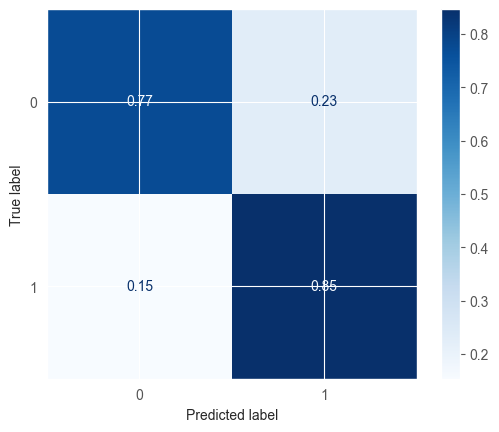

In [118]:
cm=confusion_matrix(y_test.values.ravel(), y_predL, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clfL.classes_)
disp.plot(cmap=plt.cm.Blues)

print("Accuracy:",accuracy_score(y_test.values.ravel(), y_predL))
print(classification_report(y_test, y_predL))

As we can see from the confusion matrix, data seems to be classified well, but actually, looking to the metrics, we notice that for the 1-class (the one of interest) we have a very bad precision. Precision less than 0.5 means that we have more False Positive than True Positive. Let's see if we can improve with a Feature Selection Method.

Now I apply a feature selection using the function 'SelectFromModel':

In [119]:
svcB = svm.SVC(kernel='linear',C=0.1)
sel=SelectFromModel(estimator=svcB)
sel.fit(X_train_os,y_train_os.values.ravel())
selected_feat= X_train_os.columns[(sel.get_support())]
len(selected_feat)
print('características seleccionadas:')
print(selected_feat)

características seleccionadas:
Index(['distance_roads', 'distance_powerlines', 'water', 'max_temp',
       'avg_rel_hum', 'forest_dummy', 'herbaceous_vegetation_dummy',
       'shrubland_dummy', 'urban_dummy', 'water_dummy', 'wetland_dummy'],
      dtype='object')


In [120]:
X_train_reduced = X_train_os.loc[:, selected_feat]
X_test_reduced = X_test.loc[:, selected_feat]

In [121]:
start=time.time()
aL_reduced=clfL.fit(X_train_reduced,y_train_os.values.ravel())
y_predL_reduced=aL_reduced.predict(X_test_reduced)
TimeL=time.time() - start
print("%s seconds" % (time.time() - start))


173.06788420677185 seconds


Accuracy: 0.7612346799818429
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      5614
           1       0.37      0.83      0.51       995

    accuracy                           0.76      6609
   macro avg       0.66      0.79      0.68      6609
weighted avg       0.87      0.76      0.79      6609



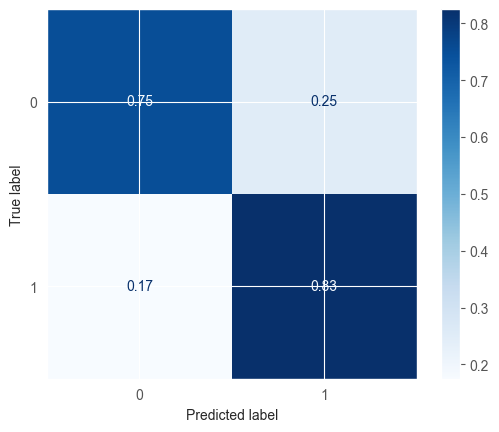

In [124]:
cm=confusion_matrix(y_test.values.ravel(), y_predL_reduced, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=aL_reduced.classes_)
disp.plot(cmap=plt.cm.Blues)

print("Accuracy:",accuracy_score(y_test.values.ravel(), y_predL_reduced))
print(classification_report(y_test, y_predL_reduced))

The result of the classification with SVM after the feature selection is faster than before (more than 30% faster); the metrics didn't change so much. In both cases, have a low precision for 1-class, which means that we have a lot of False Positive; however, the recall is quite high, which means that the classificator is very good at identifying the points that actually belong to 1 class, low number of False Negative. Moreover, also the confusion matrix gives an high percentage of well predicted points.
In any case, I want to try also other classificators.

# DECISION TREE

In [128]:
model_dtc = DecisionTreeClassifier()
start=time.time()
dtc = model_dtc.fit(X_train_os,y_train_os)
y_pred_dtc=dtc.predict(X_test)
TimeL=time.time() - start
print("%s seconds" % (time.time() - start))

1.6656279563903809 seconds


Accuracy: 0.6344378877288546
              precision    recall  f1-score   support

           0       0.94      0.61      0.74      5614
           1       0.26      0.77      0.39       995

    accuracy                           0.63      6609
   macro avg       0.60      0.69      0.56      6609
weighted avg       0.83      0.63      0.69      6609



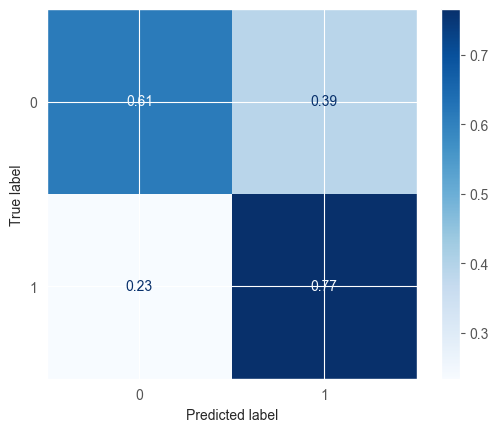

In [127]:
cm=confusion_matrix(y_test.values.ravel(), y_pred_dtc, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot(cmap=plt.cm.Blues)

print("Accuracy:",accuracy_score(y_test.values.ravel(), y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))



The algorithm is much faster than SVM, however the results are worse; this time the precision is very low, it means that almost all the predicted ignition points are false positive and this is not a very interesting result.
We also try to select only some features.

In [130]:
sel=SelectFromModel(estimator=model_dtc)
sel.fit(X_train_os,y_train_os.values.ravel())
selected_feat= X_train_os.columns[(sel.get_support())]
print('características seleccionadas:')
print(selected_feat)

características seleccionadas:
Index(['distance_roads', 'distance_powerlines', 'forest_unknown', 'pop_dens',
       'slope', 'anom_avg_soil', 'max_temp', 'avg_rel_hum'],
      dtype='object')


In [131]:
X_train_reduced = X_train_os.loc[:, selected_feat]
X_test_reduced = X_test.loc[:, selected_feat]
dtc_reduced = model_dtc.fit(X_train_reduced,y_train_os)
y_pred_dtc_reduced=dtc.predict(X_test_reduced)

print(classification_report(y_test, y_pred_dtc_reduced))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79      5614
           1       0.30      0.77      0.43       995

    accuracy                           0.69      6609
   macro avg       0.62      0.72      0.61      6609
weighted avg       0.85      0.69      0.73      6609



We improved a bit with feature selection.

# RANDOM FOREST

In [132]:
clfRF=RandomForestClassifier(max_depth=8)
parameters = {'n_estimators':[50,100,150,200,250]}
clfRF = GridSearchCV(clfRF,parameters)
print(clfRF)
start = time.time()
aRF=clfRF.fit(X_train_os,y_train_os.values.ravel())
y_predRF=aRF.predict(X_test)
TimeL=time.time() - start
print("%s seconds" % (time.time() - start))
print("Best hyperparameter:",clfRF.best_params_)
# Best hyperparameter: {'n_estimators': 50}

GridSearchCV(estimator=RandomForestClassifier(max_depth=8),
             param_grid={'n_estimators': [50, 100, 150, 200, 250]})
140.22708106040955 seconds
Best hyperparameter: {'n_estimators': 150}


Accuracy: 0.7565441065214102
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      5614
           1       0.37      0.92      0.53       995

    accuracy                           0.76      6609
   macro avg       0.68      0.82      0.68      6609
weighted avg       0.89      0.76      0.79      6609



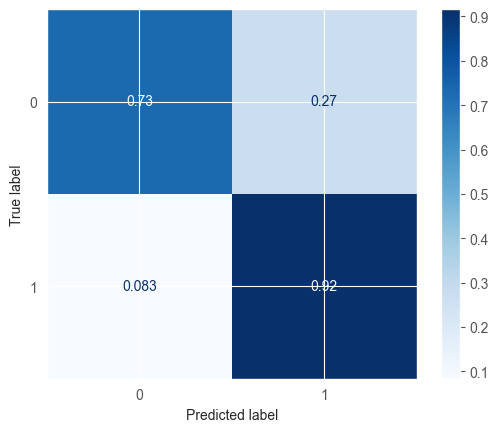

In [134]:
cm=confusion_matrix(y_test, y_predRF, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clfRF.classes_)
disp.plot(cmap=plt.cm.Blues)
print("Accuracy:",accuracy_score(y_test, y_predRF))
print(classification_report(y_test, y_predRF))

I want to select only the best features, so I use the same function as before to see if there is an improvement:

In [136]:
clfRF=RandomForestClassifier(max_depth=8)
sel=SelectFromModel(estimator=clfRF)
sel.fit(X_train_os,y_train_os.values.ravel())
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print('características seleccionadas:')
print(selected_feat)

características seleccionadas:
Index(['distance_roads', 'water', 'elevation', 'pop_dens', 'slope',
       'anom_avg_soil', 'max_temp', 'avg_rel_hum', 'avg_soil', 'sum_prec',
       'forest'],
      dtype='object')


In [137]:
X_train_reduced = X_train_os.loc[:, selected_feat]
X_test_reduced = X_test.loc[:, selected_feat]

In [138]:
aRF=RandomForestClassifier(max_depth=8)
parameters = {'n_estimators':[50,100,150,200,250]}
aRF = GridSearchCV(aRF,parameters)
start = time.time()
aRF=aRF.fit(X_train_reduced,y_train_os.values.ravel())
y_predRF=aRF.predict(X_test_reduced)
TimeL=time.time() - start
print("%s seconds" % (time.time() - start))

print("Best hyperparameter:", aRF.best_params_)
# Best hyperparameter: {'n_estimators': 150}

94.71597266197205 seconds
Best hyperparameter: {'n_estimators': 50}


Accuracy: 0.7654713269783628
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      5614
           1       0.38      0.89      0.53       995

    accuracy                           0.77      6609
   macro avg       0.68      0.82      0.69      6609
weighted avg       0.88      0.77      0.80      6609



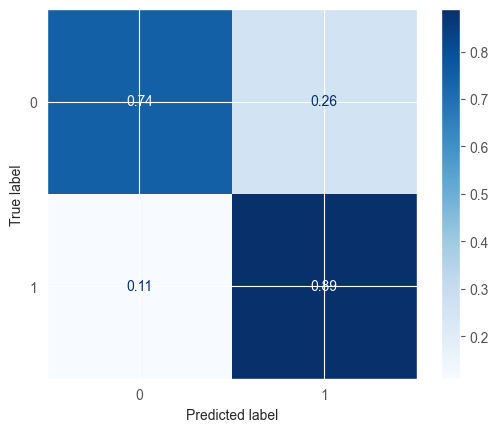

In [140]:
cm=confusion_matrix(y_test, y_predRF, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=aRF.classes_)
disp.plot(cmap=plt.cm.Blues)
#sns.heatmap(cm,annot=True, cmap='Blues')
print("Accuracy:",accuracy_score(y_test, y_predRF))
print(classification_report(y_test, y_predRF))

# Repeat the Random Forest with not-normalized data

Recover data and divide into train and test

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_original_complete, y_original, test_size=0.3, random_state=0)

Oversample the train data

In [152]:
X_train_os, y_train_os = os.fit_resample(X_train, y_train)

In [144]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(X_train_os))
print("Number of no subscription in oversampled data",len(y_train_os[y_train_os['ignition']==0]))
print("Number of subscription",len(y_train_os[y_train_os['ignition']==1]))
print("Proportion of no subscription data in oversampled data is ",len(y_train_os[y_train_os['ignition']==0])/len(X_train_os))
print("Proportion of subscription data in oversampled data is ",len(y_train_os[y_train_os['ignition']==1])/len(X_train_os))

length of oversampled data is  26192
Number of no subscription in oversampled data 13096
Number of subscription 13096
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [145]:
clfRF=RandomForestClassifier(max_depth=8)
parameters = {'n_estimators':[50,100,150,200,250]}
clfRF = GridSearchCV(clfRF,parameters)
print(clfRF)

start = time.time()
aRF_original=clfRF.fit(X_train_os,y_train_os.values.ravel())
y_predRF_orig=aRF_original.predict(X_test)
TimeL=time.time() - start

print("%s seconds" % (time.time() - start))
print("Best hyperparameter:",clfRF.best_params_)
# Best hyperparameter: {'n_estimators': 50}

GridSearchCV(estimator=RandomForestClassifier(max_depth=8),
             param_grid={'n_estimators': [50, 100, 150, 200, 250]})
143.78857016563416 seconds
Best hyperparameter: {'n_estimators': 200}


Accuracy: 0.8338629142078984
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      5614
           1       0.47      0.79      0.59       995

    accuracy                           0.83      6609
   macro avg       0.71      0.82      0.74      6609
weighted avg       0.88      0.83      0.85      6609



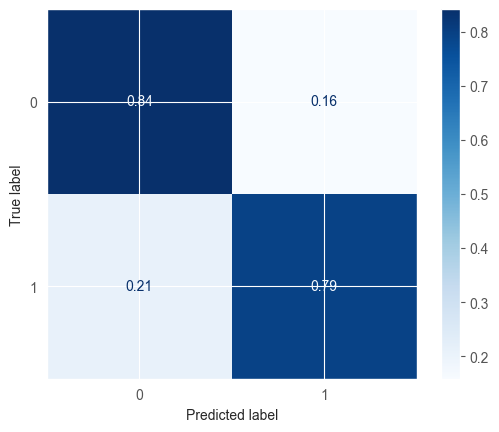

In [147]:
cm=confusion_matrix(y_test, y_predRF_orig, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=aRF_original.classes_)
disp.plot(cmap=plt.cm.Blues)
print("Accuracy:",accuracy_score(y_test, y_predRF_orig))
print(classification_report(y_test, y_predRF_orig))

In [153]:
clfRF=RandomForestClassifier(max_depth=8)
sel=SelectFromModel(estimator=clfRF)
sel.fit(X_train_os,y_train_os.values.ravel())
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print('características seleccionadas:')
print(selected_feat)

características seleccionadas:
Index(['distance_roads', 'forest_evergreen_broad', 'forest_unknown', 'water',
       'elevation', 'pop_dens', 'slope', 'anom_avg_soil', 'max_temp',
       'avg_rel_hum', 'avg_soil', 'forest'],
      dtype='object')


In [154]:
X_train_reduced = X_train_os.loc[:, selected_feat]
X_test_reduced = X_test.loc[:, selected_feat]

In [155]:
aRF=RandomForestClassifier(max_depth=8)
parameters = {'n_estimators':[50,100,150,200,250]}
aRF = GridSearchCV(aRF,parameters)
start = time.time()
aRF=aRF.fit(X_train_reduced,y_train_os.values.ravel())
y_predRF=aRF.predict(X_test_reduced)
TimeL=time.time() - start
print("%s seconds" % (time.time() - start))

print("Best hyperparameter:", aRF.best_params_)
# Best hyperparameter: {'n_estimators': 150}

89.05577802658081 seconds
Best hyperparameter: {'n_estimators': 200}


Accuracy: 0.8293236495687698
              precision    recall  f1-score   support

           0       0.96      0.84      0.89      5614
           1       0.46      0.79      0.58       995

    accuracy                           0.83      6609
   macro avg       0.71      0.81      0.74      6609
weighted avg       0.88      0.83      0.85      6609



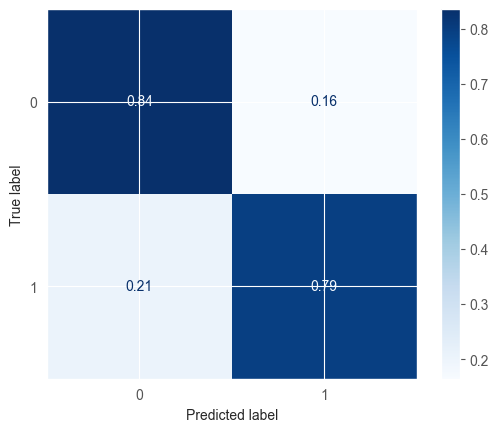

In [156]:
cm=confusion_matrix(y_test, y_predRF, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=aRF.classes_)
disp.plot(cmap=plt.cm.Blues)
#sns.heatmap(cm,annot=True, cmap='Blues')
print("Accuracy:",accuracy_score(y_test, y_predRF))
print(classification_report(y_test, y_predRF))

---

Resuming the analysis:
First of all I visualized all the data, to understand their behaviour and to tackle the presence of NaN.
I removed the not significant columns or the ones that could bring problems in my classification.
Then, I tested the log-transformation over some variables and one in particular seems to be normalized after that.
I also analyzed the correlation matrix, even though I decided to keep all the variables and the beginning because later I applied the feature selection.
The PCA analysis, as we said above, doesn't bring relevant results, so I started my classification, in particular I tried three classificators: SVM, Decision Tree and Random Forest. However, I'm perfectly conscious that much more classificators exist, but I think that the result are still interesting.
For my classification models I decided to use oversampled data, since they are very unbalanced, and normalized with StandardScaler. I could have used also MinMaxScaler but, looking at the boxplots, StandardScaler seemed to be more appropriate, and it scaled well all the columns.

Concerning the time performance, Decision Tree is obviously the fastest algorithm, however the metrics are very bad, in particular the precision for 1 class.
So I'll take into account SVM and Random Forest.
In both cases I made a comparison using the entire dataset or only some selected features: having less variables produces a shorter amount of time for the running of the models, but of course we lose some information and this fact is reflected in the metrics, which are a bit smaller.

From both models, we can see that the confusion matrix is quite good, a high percentage of ignition points are well classified, in particular looking to the RandomForest with the entire dataset, for the 1-class we reach a 92% of well classified points.
However, there is a point to be remarked, indeed, precision for 1-class is always below 0.5 and in particular in this two cases is around 0.4, which means that we have more False Positive than True Positive. The recall is still quite high and so satisfying. Concerning the precision, it is not so high but in any case we managed to classify well the ignition points, the 'problem' lies in the fact that we classified more ignition points than the actual existent, but I believe that this is not a real serious problem because if our aim is to prevent wildfires, the algorithm succeeds in well classify the 1-class. Of course, it classifies more points, but this can be seen as a security manoeuvre.
Moreover, if our aim is to prevent wildfires, we produced a good result since the recall is quite high in every case.
Of course, there could be other improvements to do in the model, such as trying other classificators or implement a new one from scratch, try to transform all the variables, use other Scaler, etc.

Finally, in the last case I tried to use the Random Forest with not-scaled data, and we lose a bit in the percentage of well classified points in the 1 class, but we gain something in the precision; however, I believe that for our aim, having a 92% of well classified ignition points can be considered satisfying.
